# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [5]:
# Import et configuration
import requests, http.client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import json
import os
from dotenv import load_dotenv


🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [6]:
today = date.today()
# print(type(today))
last_week = today - timedelta(days=7)
print(last_week)

2025-07-25


In [7]:
### 💡 Première requête guidée
def get_weather_data(city):
    """
    Récupère les données météo actuelles pour une ville
    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    load_dotenv()
# use the variables 
    api_key = os.getenv("API_KEY")
    BASE_URL = "http://api.openweathermap.org/data/2.5"
    # URL : current weather data
    url = f"{BASE_URL}/weather"
    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'en'
    }
    
    # Gérez les erreurs HTTP !
    try:
        # Send a GET request to the API with the given URL and parameters
        response = requests.get(url, params=params)

        # Raise an HTTPError if the response contains an error status code (like 404, 401, etc.)
        response.raise_for_status()

        # Print the HTTP status code and its meaning (e.g., "200 - OK", "404 - Not Found")
        print(f"{response.status_code} - {http.client.responses[response.status_code]}")

        # Return the JSON content of the response (parsed into a Python dictionary)
        return response.json()

    except requests.exceptions.HTTPError as http_err:
        # If the error code is 404, the city was not found
        if response.status_code == 404:
            print(f"The city '{city}' is not found.")
        else:
            # For any other HTTP error, print the full error message
            print(f"HTTP error occurred: {http_err}")

    except Exception as err:
        # Catch any unexpected errors (e.g., network issues, bad URL format, etc.)
        print(f"Unexpected error: {err}")

    # Return None if an error occurred
    return None


In [8]:
data = get_weather_data("Paris")
print(data)


200 - OK
{'coord': {'lon': 2.3488, 'lat': 48.8534}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.91, 'feels_like': 23.9, 'temp_min': 22.43, 'temp_max': 25.14, 'pressure': 1014, 'humidity': 59, 'sea_level': 1014, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1754053780, 'sys': {'type': 1, 'id': 6550, 'country': 'FR', 'sunrise': 1754022237, 'sunset': 1754076587}, 'timezone': 7200, 'id': 2988507, 'name': 'Paris', 'cod': 200}


In [9]:
# Configuration API
load_dotenv()
api_key = os.getenv('API_KEY')
API_KEY = api_key  # Remplacez par votre vraie clé
BASE_URL = "http://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Rome, Lazio", "Amsterdam", "Vienna"]

**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?
- Comment gérer une ville introuvable ?

---

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [10]:
# Configuration Visual Crossing
load_dotenv()

VC_API_KEY = os.getenv("API_KEY2")
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

def get_historical_weather(city, start_date, end_date):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """
    url = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"

    params = {
        'key': VC_API_KEY,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed,pressure'
    }
    try :
    # Votre implémentation ici
        respo = requests.get(url, params=params)
        respo.raise_for_status()
        #df_data = respo.json()
        return respo.json()
    #gestion d'erreurs !
    except requests.exceptions.HTTPError as http_err :
        if respo.status_code == 404 :
            print(f"the city {city} is not found !")
        else : 
            print(f"HTTP error occurred: {http_err}")
    except Exception as err :
        # Catch any unexpected errors (e.g., network issues, bad URL format, etc.)
        print(f"Unexpected error: {err}")
    return None




In [11]:
# Get historical weather data for Paris between July 1st and 15th, 2024
json_data = get_historical_weather("Paris", last_week, today)

# Check if data was retrieved successfully
#if json_data:
# Extract the 'days' section from the JSON, which contains the weather data for each day
heart = json_data["days"]

# Create a list to store daily weather info as dictionaries
weather_data = []
for day in heart:
        weather_data.append({
            "date": day["datetime"],           # Date of the record
            "temperature": day["temp"],        # Average temperature
            "humidity": day["humidity"],       # Humidity percentage
            "precipitation": day["precip"],    # Precipitation amount
            "wind_speed": day["windspeed"],    # Wind speed
            "pressure": day["pressure"]        # Atmospheric pressure
        })
  
# Convert the list of dictionaries into a pandas DataFrame
df_weather = pd.DataFrame(weather_data)

# Print the first few rows to confirm the DataFrame structure
print(df_weather.head())

         date  temperature  humidity  precipitation  wind_speed  pressure
0  2025-07-25         69.3      72.8          0.000         7.6    1017.7
1  2025-07-26         70.5      67.8          0.000        10.1    1018.2
2  2025-07-27         65.8      79.1          0.195        14.2    1016.4
3  2025-07-28         66.0      66.1          0.000         8.5    1019.9
4  2025-07-29         64.7      72.0          0.009         9.5    1020.6


In [12]:
# Get historical weather data for all cities and collect all in one list
weather_data_all = []
start_date = "2024-07-01"
end_date = "2024-07-15"

for city in CITIES:
    weather_json = get_historical_weather(city, last_week, today)
    if weather_json and "days" in weather_json:
        for day in weather_json["days"]:
            weather_data_all.append({
                "city": city,
                "date": day["datetime"],
                "temperature": day["temp"],
                "humidity": day["humidity"],
                "precipitation": day["precip"],
                "wind_speed": day["windspeed"],
                "pressure": day["pressure"]
            })
    else:
        print(f"[!] No weather data for {city}")

# Convert collected weather data to DataFrame
df_weather = pd.DataFrame(weather_data_all)

### 🎯 Mission pratique
Récupérez les données des 7 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [13]:
# Load API key from .env file
load_dotenv()
API_KEY = os.getenv("API_KEY")

# ----------------------
# Step 1: Get coordinates from city name
# ----------------------
def get_coordinates(city_name):
    url = "http://api.openweathermap.org/geo/1.0/direct"
    params = {
        "q": city_name,
        "limit": 1,
        "appid": API_KEY
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if data:
            lat = data[0]["lat"]
            lon = data[0]["lon"]
            return lat, lon
        else:
            print(f"[!] No coordinates found for {city_name}")
            return None, None
    except Exception as e:
        print(f"[ERROR] Failed to get coordinates for {city_name}: {e}")
        return None, None

# ----------------------
# Step 2: Get air quality from lat/lon
# ----------------------
def get_air_quality(lat, lon):
        """
    Récupère les données de qualité de l'air

    URL : http://api.openweathermap.org/data/2.5/air_pollution

    Étapes :
    1. Utiliser les coordonnées lat/lon des villes
    2. Récupérer l'indice AQI et les composants (PM2.5, PM10, O3, etc.)
    3. Joindre ces données avec vos données météo
    """
        url = "http://api.openweathermap.org/data/2.5/air_pollution"
        params = {
        "lat": lat,
        "lon": lon,
        "appid": API_KEY
    }

        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            return response.json()
        except Exception as e:
            print(f"[ERROR] Failed to get AQI for {lat}, {lon}: {e}")
            return None

# ----------------------
# Step 3: Main logic
# ----------------------

#cities = ["Paris", "Berlin", "Madrid", "Rome, Lazio", "Amsterdam", "Vienna"]

# Final list to store results
results = []

for city_name in CITIES:
    lat, lon = get_coordinates(city_name)

    if lat and lon:
        aqi_data = get_air_quality(lat, lon)

        if aqi_data and "list" in aqi_data:
            info = aqi_data["list"][0]
            components = info["components"]

            results.append({
                "city": city_name,
                # "lat": lat,
                # "lon": lon,
                "aqi": info["main"]["aqi"],
                "co": components.get("co"),
                "no": components.get("no"),
                "no2": components.get("no2"),
                "o3": components.get("o3"),
                "so2": components.get("so2"),
                "pm2_5": components.get("pm2_5"),
                "pm10": components.get("pm10"),
                "nh3": components.get("nh3")
            })
        else:
            print(f"[!] No AQI data for {city_name}")

# ----------------------
# Step 4: Save to DataFrame
# ----------------------

df = pd.DataFrame(results)
print(df)

# Optional: save to CSV
#df.to_csv("air_quality_data.csv", index=False)
#print("Data saved to air_quality_data.csv")


          city  aqi      co    no   no2      o3   so2  pm2_5   pm10   nh3
0        Paris    2  120.23  0.08  0.66   76.54  0.33   1.36   1.77  1.25
1       Berlin    1  134.94  0.51  4.66   53.44  0.73   0.92   1.06  1.63
2       Madrid    3  186.09  0.07  0.82  123.95  0.27  19.80  24.50  3.05
3  Rome, Lazio    2  114.93  0.02  0.13   89.59  0.33   4.26  10.58  0.94
4    Amsterdam    2  129.96  0.40  3.39   61.56  1.05   0.72   1.06  0.95
5       Vienna    2  111.32  0.09  1.53   86.42  0.92   1.91   2.24  1.43


In [14]:
# Merge weather data with air quality data on 'city'
df_merged = pd.merge(df_weather, df, on="city", how="left")

In [15]:
# Display merged result
df_merged

,city,date,temperature,humidity,precipitation,wind_speed,pressure,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Paris,2025-07-25,69.3,72.8,0.000,7.6,1017.7,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
1,Paris,2025-07-26,70.5,67.8,0.000,10.1,1018.2,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
2,Paris,2025-07-27,65.8,79.1,0.195,14.2,1016.4,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
3,Paris,2025-07-28,66.0,66.1,0.000,8.5,1019.9,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
4,Paris,2025-07-29,64.7,72.0,0.009,9.5,1020.6,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
5,Paris,2025-07-30,68.4,73.8,0.078,9.2,1018.6,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
6,Paris,2025-07-31,68.8,70.5,0.000,8.5,1018.5,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
7,Paris,2025-08-01,65.9,74.9,0.210,10.3,1014.9,2,120.23,0.08,0.66,76.54,0.33,1.36,1.77,1.25
8,Berlin,2025-07-25,67.9,85.0,0.173,12.1,1013.5,1,134.94,0.51,4.66,53.44,0.73,0.92,1.06,1.63
9,Berlin,2025-07-26,66.8,78.5,0.099,9.7,1014.8,1,134.94,0.51,4.66,53.44,0.73,0.92,1.06,1.63


In [16]:
### 🗺️ Obtenir les coordonnées
# ----------------------
def get_coordinates(city_name):
    url = "http://api.openweathermap.org/geo/1.0/direct"
    params = {
        "q": city_name,
        "limit": 1,
        "appid": API_KEY
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if data:
            lat = data[0]["lat"]
            lon = data[0]["lon"]
            return lat, lon
        else:
            print(f"[!] No coordinates found for {city_name}")
            return None, None
    except Exception as e:
        print(f"[ERROR] Failed to get coordinates for {city_name}: {e}")
        return None, None

In [17]:
get_coordinates("Paris")

(48.8588897, 2.3200410217200766)


## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

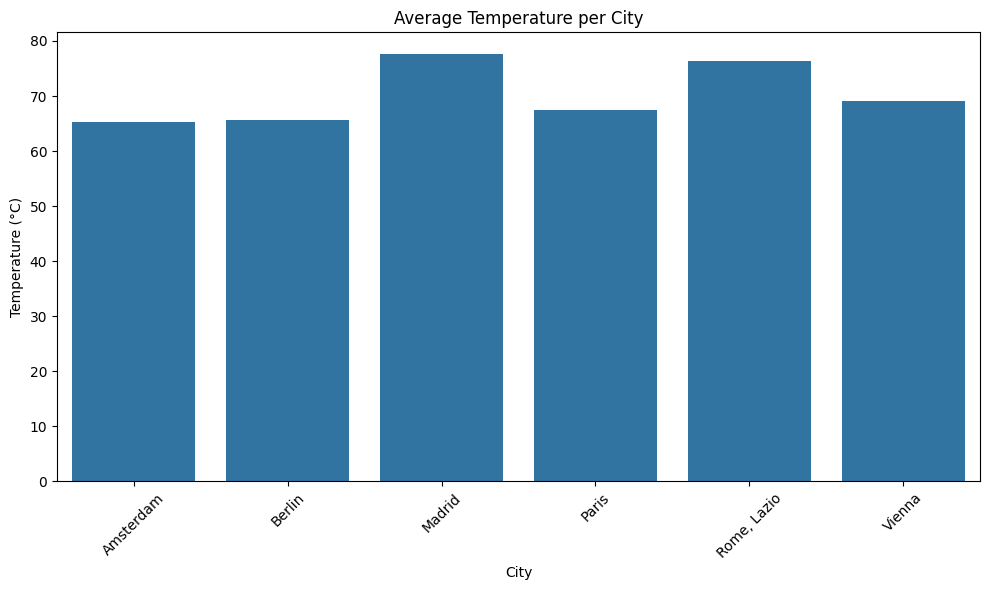

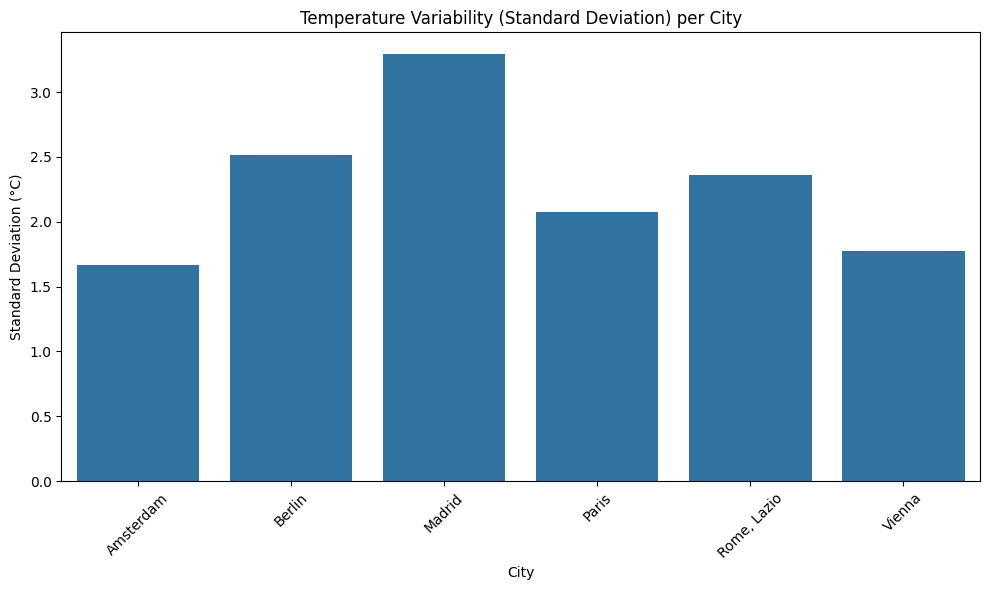

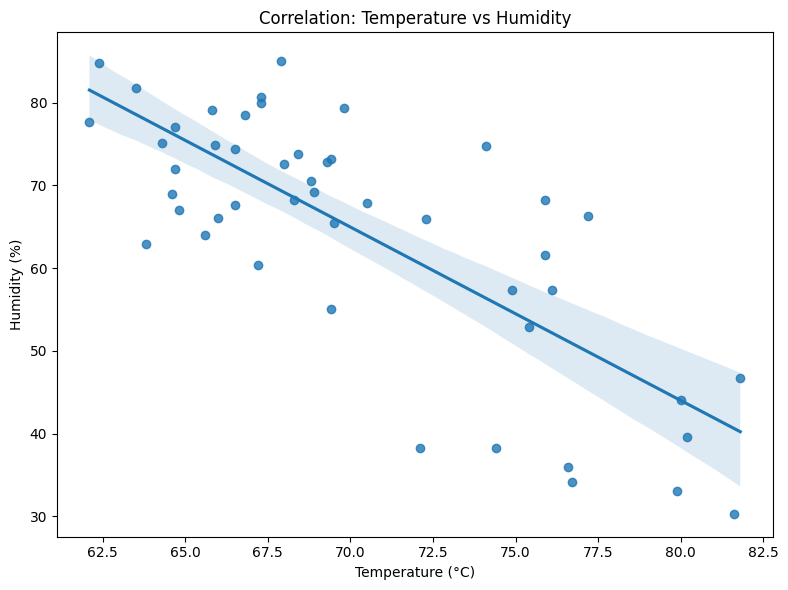

In [18]:
# 1. Average temperature per city
avg_temp = df_merged.groupby("city")["temperature"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_temp, x="city", y="temperature")
plt.title("Average Temperature per City")
plt.ylabel("Temperature (°C)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Temperature variability (standard deviation) per city
std_temp = df_merged.groupby("city")["temperature"].std().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=std_temp, x="city", y="temperature")
plt.title("Temperature Variability (Standard Deviation) per City")
plt.ylabel("Standard Deviation (°C)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Correlation between temperature and humidity (scatter plot with regression line)
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merged, x="temperature", y="humidity")
plt.title("Correlation: Temperature vs Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()


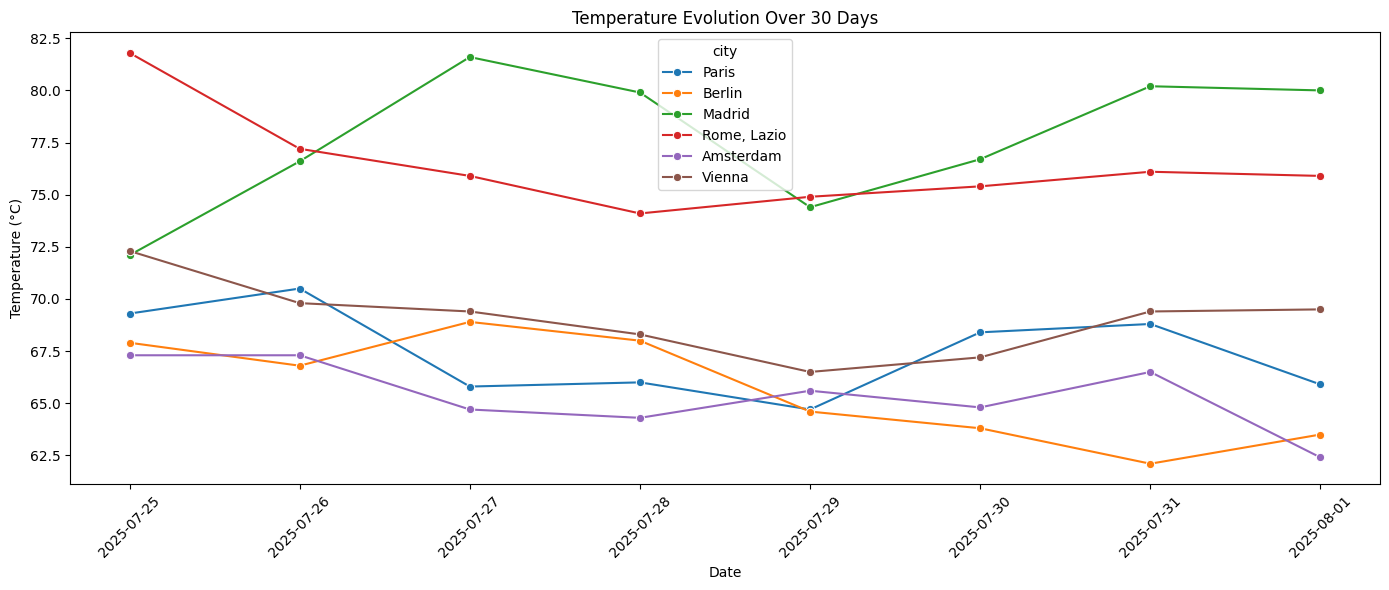

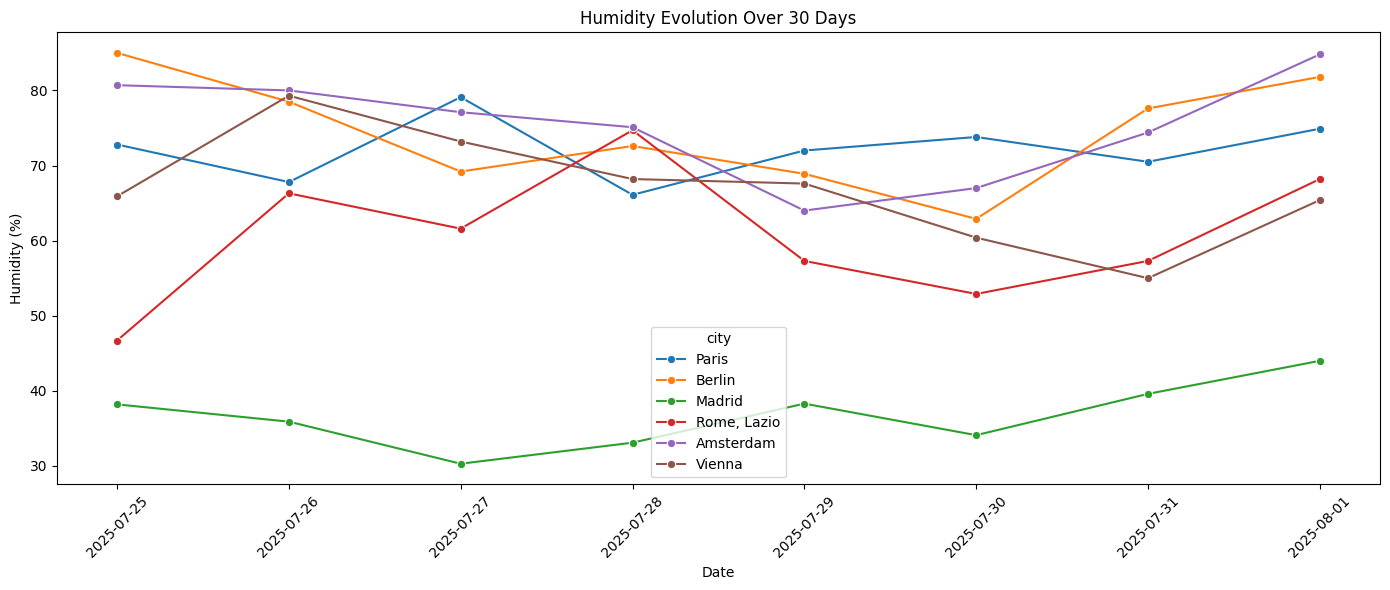

In [19]:
# Make sure 'date' column is datetime type
df_merged["date"] = pd.to_datetime(df_merged["date"])

# 1. Line plot: Temperature over 30 days per city
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_merged, x="date", y="temperature", hue="city", marker="o")
plt.title("Temperature Evolution Over 30 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line plot: Humidity over 30 days per city
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_merged, x="date", y="humidity", hue="city", marker="o")
plt.title("Humidity Evolution Over 30 Days")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


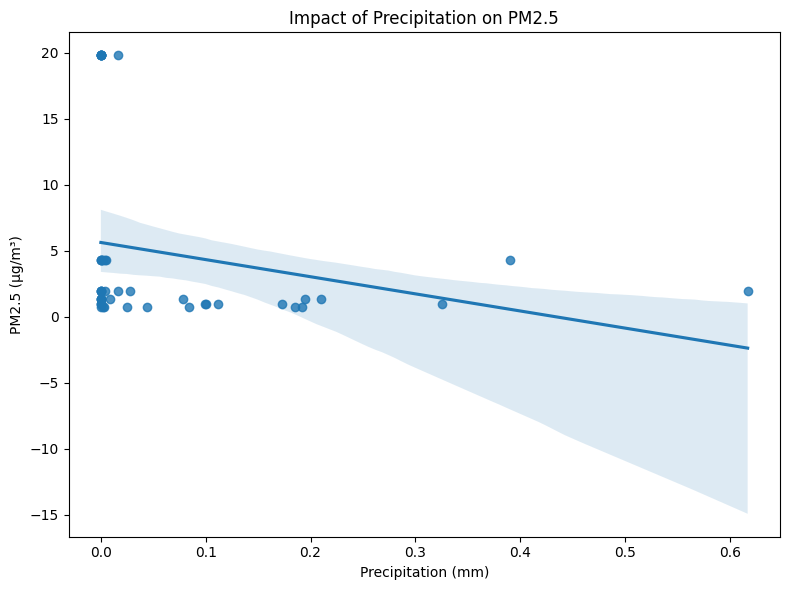

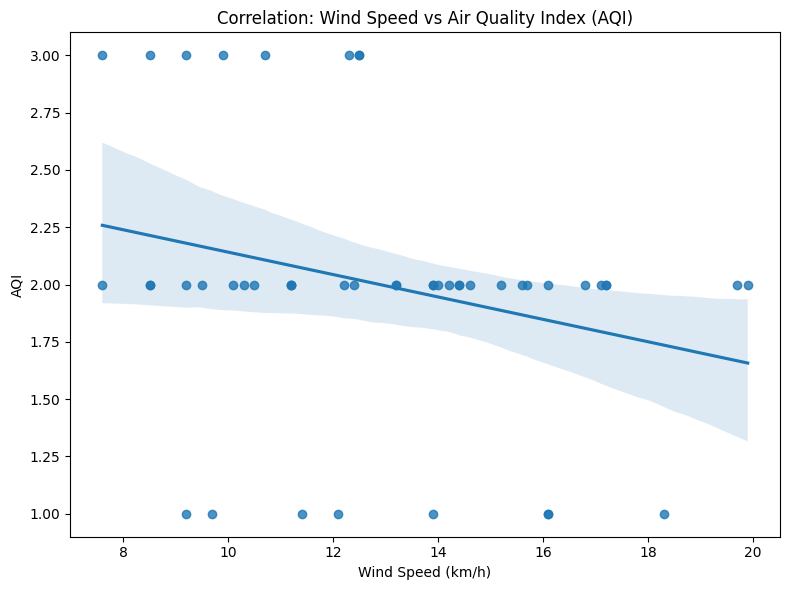

In [20]:
# 1. Scatter plot: Precipitation vs PM2.5
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merged, x="precipitation", y="pm2_5")
plt.title("Impact of Precipitation on PM2.5")
plt.xlabel("Precipitation (mm)")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()

# 2. Scatter plot: Wind speed vs AQI
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merged, x="wind_speed", y="aqi")
plt.title("Correlation: Wind Speed vs Air Quality Index (AQI)")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

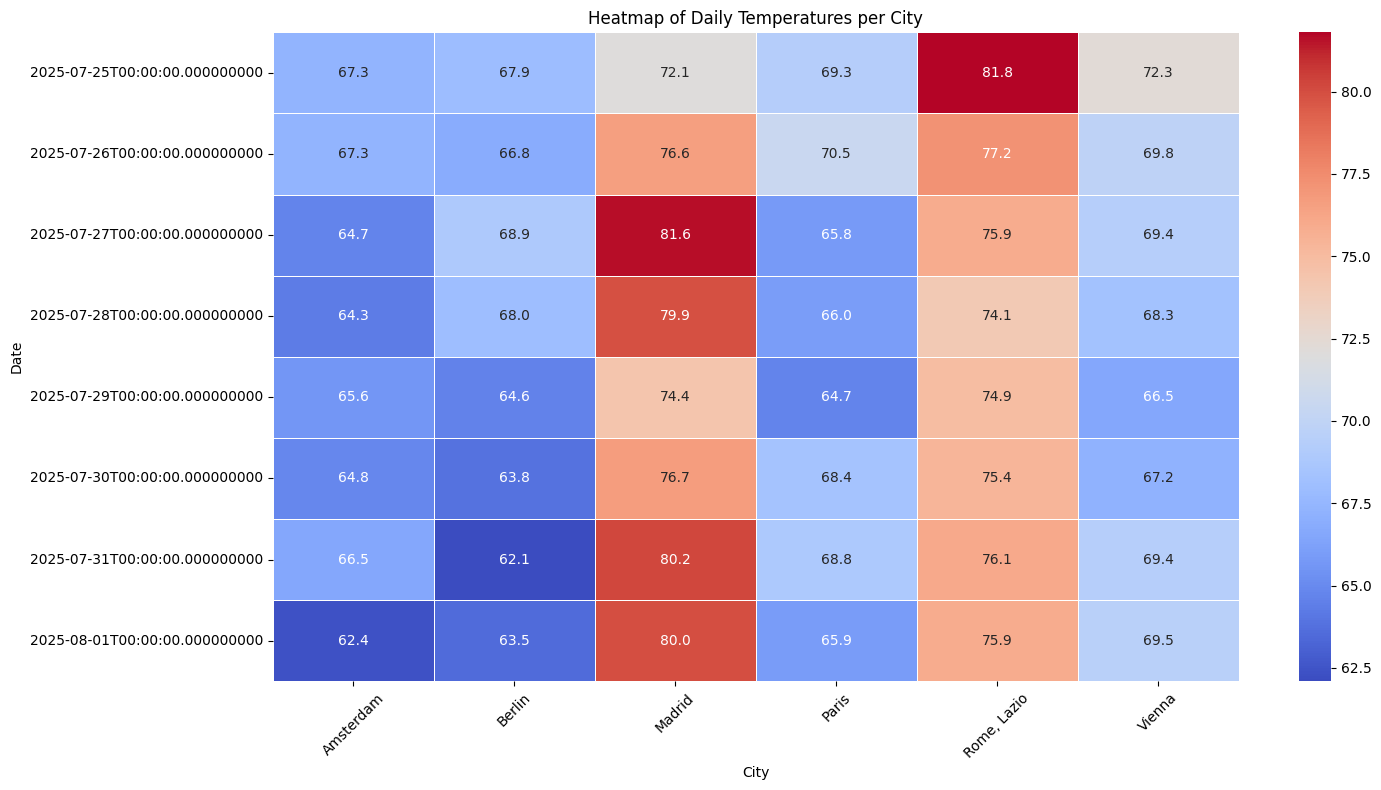

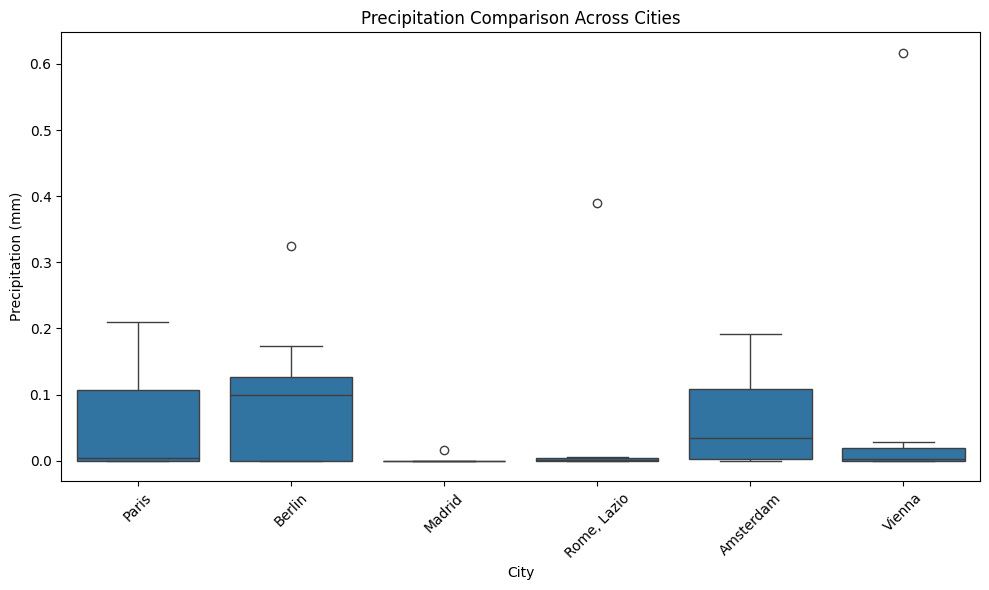

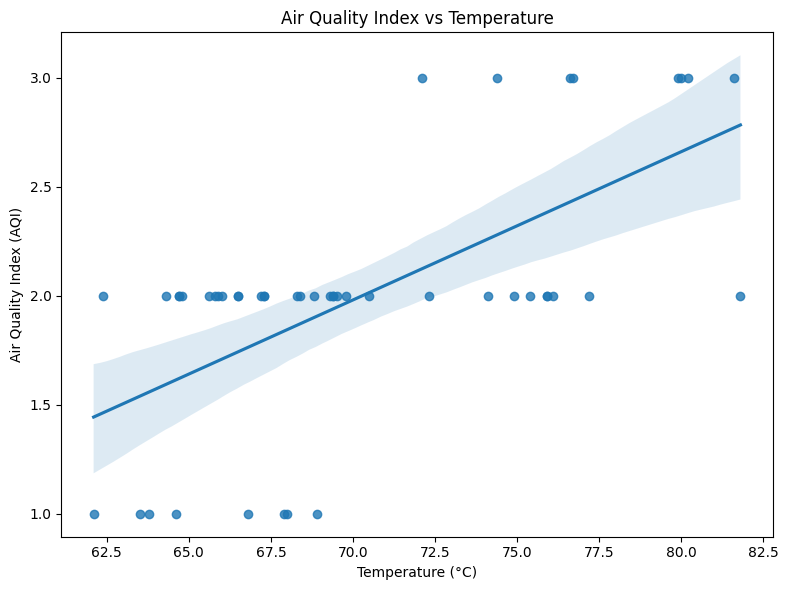

In [21]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
plt.figure(figsize=(15, 8))

# Prepare pivot table: dates as rows, cities as columns
heatmap_data = df_merged.pivot_table(index="date", columns="city", values="temperature")

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Daily Temperatures per City")
plt.xlabel("City")
plt.ylabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 2. Boxplot comparatif des précipitations
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="city", y="precipitation")
plt.title("Precipitation Comparison Across Cities")
plt.xlabel("City")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Scatter plot qualité air vs température
plt.figure(figsize=(8, 6))
sns.regplot(data=df_merged, x="temperature", y="aqi")
plt.title("Air Quality Index vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Air Quality Index (AQI)")
plt.tight_layout()
plt.show()


## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [22]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [23]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites